In [ ]:
-- NOT IN

SELECT * FROM Customers
WHERE City NOT IN ('Paris', 'London');

In [ ]:
-- NOT BETWEEN

SELECT * FROM Customers
WHERE CustomerID NOT BETWEEN 10 AND 60;

In [ ]:
-- NOT GREATER THAN (the same can be done with less than)

SELECT * FROM Customers
WHERE NOT CustomerID > 50;

In [ ]:
-- INSERT INTO

INSERT INTO table_name (column1, column2, column3, ...)
VALUES (value1, value2, value3, ...);

INSERT INTO Customers (CustomerName, ContactName, Address, City, PostalCode, Country)
VALUES ('Cardinal', 'Tom B. Erichsen', 'Skagen 21', 'Stavanger', '4006', 'Norway');

In [ ]:
-- INSERT INTO MULTIPLE ROWS

INSERT INTO Customers (CustomerName, ContactName, Address, City, PostalCode, Country)
VALUES
('Cardinal', 'Tom B. Erichsen', 'Skagen 21', 'Stavanger', '4006', 'Norway'),
('Greasy Burger', 'Per Olsen', 'Gateveien 15', 'Sandnes', '4306', 'Norway'),
('Tasty Tee', 'Finn Egan', 'Streetroad 19B', 'Liverpool', 'L1 0AA', 'UK');

In [ ]:
-- Testing NULLS

SELECT column_names
FROM table_name
WHERE column_name IS NULL; -- can be not null

In [ ]:
-- UPDATE

UPDATE table_name
SET column1 = value1, column2 = value2, ...
WHERE condition;

UPDATE Customers
SET ContactName = 'Alfred Schmidt', City= 'Frankfurt'
WHERE CustomerID = 1;

In [ ]:
-- DELETE

DELETE FROM table_name
WHERE condition;

DELETE FROM Customers
WHERE CustomerName='Alfreds Futterkiste';

In [ ]:
-- DELETE A TABLE

DROP TABLE Costumers;

In [ ]:
-- TOP
SELECT TOP 3 * FROM Customers;

-- MySQL syntax
SELECT column_name(s)
FROM table_name
WHERE condition
LIMIT number;

In [ ]:
-- The following SQL statement selects the first 50% of the records from the "Customers" table (for SQL Server/MS Access):

SELECT TOP 50 PERCENT * FROM Customers;

-- The following SQL statement shows the equivalent example for Oracle:
SELECT * FROM Customers
FETCH FIRST 50 PERCENT ROWS ONLY;

## SQL Aggregate Functions
An aggregate function is a function that performs a calculation on a set of values, and returns a single value.

Aggregate functions are often used with the GROUP BY clause of the SELECT statement. The GROUP BY clause splits the result-set into groups of values and the aggregate function can be used to return a single value for each group.

The most commonly used SQL aggregate functions are:

- MIN() - returns the smallest value within the selected column
- MAX() - returns the largest value within the selected column
- COUNT() - returns the number of rows in a set
- SUM() - returns the total sum of a numerical column
- AVG() - returns the average value of a numerical column

Aggregate functions ignore null values (except for COUNT()).

In [ ]:
-- MIN with AS

SELECT MIN(Price) AS SmallestPrice
FROM Products;

In [ ]:
-- COUNT (including null values)
SELECT COUNT(*)
FROM Products;

-- COUNT (discards null values)

SELECT COUNT(ProductID)
FROM Products;

-- COUNT with WHERE

SELECT COUNT(ProductID)
FROM Products
WHERE Price > 20;

-- Ignoring duplicates

SELECT COUNT(DISTINCT Price)
FROM Products;

In [ ]:
-- Using an Alias
SELECT COUNT(*) AS [Number of records]
FROM Products;

In [ ]:
-- Use COUNT() with GROUP BY
-- Here we use the COUNT() function and the GROUP BY clause, to return the number of records for each category in the Products table:

SELECT COUNT(*) AS [Number of records], CategoryID
FROM Products
GROUP BY CategoryID;

In [ ]:
-- SUM with GROUP BY
SELECT OrderID, SUM(Quantity) AS [Total Quantity]
FROM OrderDetails
GROUP BY OrderID;

In [ ]:
-- LIKE

SELECT column1, column2, ...
FROM table_name
WHERE columnN LIKE pattern;

-- Example

SELECT * FROM Customers
WHERE city LIKE 'L_nd__';

SELECT * FROM Customers
WHERE CustomerName LIKE 'La%';

SELECT * FROM Customers
WHERE city LIKE '%L%';

-- Return all customers that starts with "a" and are at least 3 characters in length:

SELECT * FROM Customers
WHERE CustomerName LIKE 'a__%';

-- Return all customers that have "r" in the second position:

SELECT * FROM Customers
WHERE CustomerName LIKE '_r%';

### Wildcard Characters

Symbol	Description
* %	Represents zero or more characters
* _	Represents a single character
* []Represents any single character within the brackets *
* ^ Represents any character not in the brackets *
* -	Represents any single character within the specified range *
* {}	Represents any escaped character **

In [ ]:
SELECT * FROM Customers
WHERE CustomerName LIKE '[bsp]%';

-- Return all customers starting with "a", "b", "c", "d", "e" or "f":

SELECT * FROM Customers
WHERE CustomerName LIKE '[a-f]%';

## The SQL IN Operator
The IN operator allows you to specify multiple values in a WHERE clause.

The IN operator is a shorthand for multiple OR conditions.

In [ ]:
SELECT * FROM Customers
WHERE Country IN ('Germany', 'France', 'UK');

SELECT * FROM Customers
WHERE Country NOT IN ('Germany', 'France', 'UK');

-- Example
-- Return all customers that have NOT placed any orders in the Orders table:

SELECT * FROM Customers
WHERE CustomerID NOT IN (SELECT CustomerID FROM Orders);

## The SQL BETWEEN Operator
The BETWEEN operator selects values within a given range. The values can be numbers, text, or dates.

The BETWEEN operator is inclusive: begin and end values are included. 

In [ ]:
SELECT column_name(s)
FROM table_name
WHERE column_name BETWEEN value1 AND value2;

-- NOT BETWEEN

SELECT * FROM Products
WHERE Price NOT BETWEEN 10 AND 20;

-- BETWEEN with IN
-- The following SQL statement selects all products with a price between 10 and 20. In addition, the CategoryID must be either 1,2, or 3:

SELECT * FROM Products
WHERE Price BETWEEN 10 AND 20
AND CategoryID IN (1,2,3);

SELECT * FROM Products
WHERE ProductName BETWEEN 'Carnarvon Tigers' AND 'Mozzarella di Giovanni'
ORDER BY ProductName;

-- BETWEEN Dates
-- The following SQL statement selects all orders with an OrderDate between '01-July-1996' and '31-July-1996':

SELECT * FROM Orders
WHERE OrderDate BETWEEN #07/01/1996# AND #07/31/1996#;

OR

SELECT * FROM Orders
WHERE OrderDate BETWEEN '1996-07-01' AND '1996-07-31';

In [ ]:
-- ALIAS AS

-- for columns
SELECT column_name AS alias_name
FROM table_name;

OR

-- for tables
SELECT column_name(s)
FROM table_name AS alias_name;

-- Example
SELECT CustomerID AS ID
FROM Customers;

-- Name with spaces can be between [] or ""
SELECT ProductName AS [My Great Products]
FROM Products;

-- Concatenate Columns
-- The following SQL statement creates an alias named "Address" that combine four columns (Address, PostalCode, City and Country):

SELECT CustomerName, Address + ', ' + PostalCode + ' ' + City + ', ' + Country AS Address
FROM Customers;

-- In MySQL

SELECT CustomerName, CONCAT(Address,', ',PostalCode,', ',City,', ',Country) AS Address
FROM Customers;

-- Alias for tables

SELECT o.OrderID, o.OrderDate, c.CustomerName
FROM Customers AS c, Orders AS o
WHERE c.CustomerName='Around the Horn' AND c.CustomerID=o.CustomerID;

## Different Types of SQL JOINs
Here are the different types of the JOINs in SQL:

* (INNER) JOIN: Returns records that have matching values in both tables
* LEFT (OUTER) JOIN: Returns all records from the left table, and the matched records from the right table
* RIGHT (OUTER) JOIN: Returns all records from the right table, and the matched records from the left table
* FULL (OUTER) JOIN: Returns all records when there is a match in either left or right table

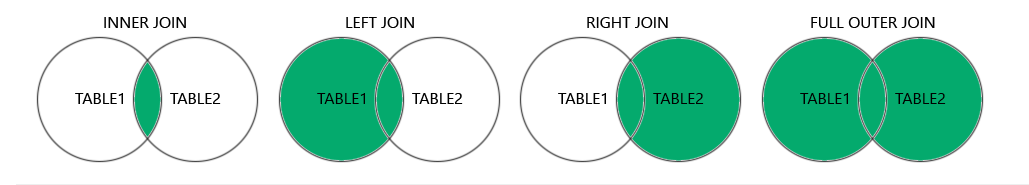

In [ ]:
-- INNER JOIN

SELECT column_name(s)
FROM table1
INNER JOIN table2
ON table1.column_name = table2.column_name;



SELECT Products.ProductID, Products.ProductName, Categories.CategoryName
FROM Products
INNER JOIN Categories ON Products.CategoryID = Categories.CategoryID;

-- JOIN three tables

SELECT Orders.OrderID, Customers.CustomerName, Shippers.ShipperName
FROM ((Orders
INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID)
INNER JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID);

-- LEFT JOIN

SELECT column_name(s)
FROM table1
LEFT JOIN table2
ON table1.column_name = table2.column_name;

-- SQL LEFT JOIN Example
-- The following SQL statement will select all customers, and any orders they might have:

SELECT Customers.CustomerName, Orders.OrderID
FROM Customers
LEFT JOIN Orders ON Customers.CustomerID = Orders.CustomerID
ORDER BY Customers.CustomerName;

/*
SQL FULL OUTER JOIN Keyword
The FULL OUTER JOIN keyword returns all records when there is a match in left (table1) or right (table2) table records.

Tip: FULL OUTER JOIN and FULL JOIN are the same.
*/
SELECT column_name(s)
FROM table1
FULL OUTER JOIN table2
ON table1.column_name = table2.column_name
WHERE condition;

SELECT Customers.CustomerName, Orders.OrderID
FROM Customers
FULL OUTER JOIN Orders ON Customers.CustomerID=Orders.CustomerID
ORDER BY Customers.CustomerName;

In [ ]:
--SQL Self Join
-- A self join is a regular join, but the table is joined with itself.

SELECT column_name(s)
FROM table1 T1, table1 T2
WHERE condition;

SELECT A.CustomerName AS CustomerName1, B.CustomerName AS CustomerName2, A.City
FROM Customers A, Customers B
WHERE A.CustomerID <> B.CustomerID
AND A.City = B.City
ORDER BY A.City;

### The SQL UNION Operator
The UNION operator is used to combine the result-set of two or more SELECT statements.

* Every SELECT statement within UNION must have the same number of columns
* The columns must also have similar data types
* The columns in every SELECT statement must also be in the same order

In [ ]:
SELECT column_name(s) FROM table1
UNION
SELECT column_name(s) FROM table2;

-- UNION ALL Syntax
-- The UNION operator selects only distinct values by default. To allow duplicate values, use UNION ALL:

SELECT column_name(s) FROM table1
UNION ALL
SELECT column_name(s) FROM table2;

-- UNION with WHERE

SELECT City, Country FROM Customers
WHERE Country='Germany'
UNION
SELECT City, Country FROM Suppliers
WHERE Country='Germany'
ORDER BY City;

-- Creates a column Alias Type that lists if the person is a 'Customer' or 'Supplier'

SELECT 'Customer' AS Type, ContactName, City, Country
FROM Customers
UNION
SELECT 'Supplier', ContactName, City, Country
FROM Suppliers;

### The SQL GROUP BY Statement
The GROUP BY statement groups rows that have the same values into summary rows, like "find the number of customers in each country".

The GROUP BY statement is often used with aggregate functions (COUNT(), MAX(), MIN(), SUM(), AVG()) to group the result-set by one or more columns.

'''GROUP BY Syntax
SELECT column_name(s)
FROM table_name
WHERE condition
GROUP BY column_name(s)
ORDER BY column_name(s);'''

In [ ]:
SELECT COUNT(CustomerID), Country
FROM Customers
GROUP BY Country
ORDER BY COUNT(CustomerID) DESC;

In [ ]:
-- GROUP BY With JOIN Example
-- The following SQL statement lists the number of orders sent by each shipper:

SELECT Shippers.ShipperName, COUNT(Orders.OrderID) AS NumberOfOrders FROM Orders
LEFT JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
GROUP BY ShipperName;

## The SQL HAVING Clause
The HAVING clause was added to SQL because the WHERE keyword cannot be used with aggregate functions.

In [ ]:
SELECT column_name(s)
FROM table_name
WHERE condition
GROUP BY column_name(s)
HAVING condition
ORDER BY column_name(s);

-- The following SQL statement lists the number of customers in each country. Only include countries with more than 5 customers:

SELECT COUNT(CustomerID), Country
FROM Customers
GROUP BY Country
HAVING COUNT(CustomerID) > 5;

-- The following SQL statement lists if the employees "Davolio" or "Fuller" have registered more than 25 orders:

SELECT Employees.LastName, COUNT(Orders.OrderID) AS NumberOfOrders
FROM Orders
INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
WHERE LastName = 'Davolio' OR LastName = 'Fuller'
GROUP BY LastName
HAVING COUNT(Orders.OrderID) > 25;

## The SQL EXISTS Operator
The EXISTS operator is used to test for the existence of any record in a subquery.

The EXISTS operator returns TRUE if the subquery returns one or more records.

In [ ]:
SELECT column_name(s)
FROM table_name
WHERE EXISTS
(SELECT column_name FROM table_name WHERE condition);


-- The following SQL statement returns TRUE and lists the suppliers with a product price less than 20:

SELECT SupplierName
FROM Suppliers
WHERE EXISTS (SELECT ProductName FROM Products WHERE Products.SupplierID = Suppliers.supplierID AND Price < 20);

## The SQL ANY Operator

* Returns a boolean value as a result
* Returns TRUE if ANY of the subquery values meet the condition
* ANY means that the condition will be true if the operation is true for any of the values in the range.

Note: The operator must be a standard comparison operator (=, <>, !=, >, >=, <, or <=).

In [ ]:
SELECT column_name(s)
FROM table_name
WHERE column_name operator ANY
  (SELECT column_name
  FROM table_name
  WHERE condition);

## The SQL ALL Operator

* Returns a boolean value as a result
* Returns TRUE if ALL of the subquery values meet the condition
* Is used with SELECT, WHERE and HAVING statements
* ALL means that the condition will be true only if the operation is true for all values in the range. 

In [ ]:
SELECT ALL column_name(s)
FROM table_name
WHERE condition;

-- ALL Syntax With WHERE or HAVING

SELECT column_name(s)
FROM table_name
WHERE column_name operator ALL
  (SELECT column_name
  FROM table_name
  WHERE condition);

-- The following SQL statement lists the ProductName if it finds ANY records in the OrderDetails table has Quantity equal to 10 (this will return TRUE because the Quantity column has some values of 10):

SELECT ProductName
FROM Products
WHERE ProductID = ANY
  (SELECT ProductID
  FROM OrderDetails
  WHERE Quantity = 10);

-- The following SQL statement lists ALL the product names:

SELECT ALL ProductName
FROM Products
WHERE TRUE;

## The SQL SELECT INTO Statement

The SELECT INTO statement copies data from one table into a new table.

In [ ]:
SELECT *
INTO newtable [IN externaldb]
FROM oldtable
WHERE condition;

OR

SELECT column1, column2, column3
INTO newtable [IN externaldb]
FROM oldtable
WHERE condition;

-- The following SQL statement creates a backup copy of Customers:

SELECT * INTO CustomersBackup2017
FROM Customers;

-- The following SQL statement uses the IN clause to copy the table into a new table in another database:

SELECT * INTO CustomersBackup2017 IN 'Backup.mdb'
FROM Customers;

-- The following SQL statement copies data from more than one table into a new table:

SELECT Customers.CustomerName, Orders.OrderID
INTO CustomersOrderBackup2017
FROM Customers
LEFT JOIN Orders ON Customers.CustomerID = Orders.CustomerID;

-- Tip: SELECT INTO can also be used to create a new, empty table using the schema of another. Just add a WHERE clause that causes the query to return no data:

SELECT * INTO newtable
FROM oldtable
WHERE 1 = 0;

### The SQL INSERT INTO SELECT Statement

The INSERT INTO SELECT statement copies data from one table and inserts it into another table.

The INSERT INTO SELECT statement requires that the data types in source and target tables match.

Note: The existing records in the target table are unaffected.

In [ ]:
INSERT INTO table2
SELECT * FROM table1
WHERE condition;

-- Copy only some columns from one table into another table:

INSERT INTO table2 (column1, column2, column3, ...)
SELECT column1, column2, column3, ...
FROM table1
WHERE condition

-- Copy "Suppliers" into "Customers" (the columns that are not filled with data, will contain NULL):

INSERT INTO Customers (CustomerName, City, Country)
SELECT SupplierName, City, Country FROM Suppliers;

-- Copy "Suppliers" into "Customers" (fill all columns):

INSERT INTO Customers (CustomerName, ContactName, Address, City, PostalCode, Country)
SELECT SupplierName, ContactName, Address, City, PostalCode, Country FROM Suppliers;

-- Copy only the German suppliers into "Customers":

INSERT INTO Customers (CustomerName, City, Country)
SELECT SupplierName, City, Country FROM Suppliers
WHERE Country='Germany';

## The SQL CASE Expression

The CASE expression goes through conditions and returns a value when the first condition is met (like an if-then-else statement). So, once a condition is true, it will stop reading and return the result. If no conditions are true, it returns the value in the ELSE clause.

If there is no ELSE part and no conditions are true, it returns NULL.

In [ ]:
CASE
    WHEN condition1 THEN result1
    WHEN condition2 THEN result2
    WHEN conditionN THEN resultN
    ELSE result
END;

-- The following SQL goes through conditions and returns a value when the first condition is met:

SELECT OrderID, Quantity,
CASE
    WHEN Quantity > 30 THEN 'The quantity is greater than 30'
    WHEN Quantity = 30 THEN 'The quantity is 30'
    ELSE 'The quantity is under 30'
END AS QuantityText
FROM OrderDetails;

-- The following SQL will order the customers by City. However, if City is NULL, then order by Country:

SELECT CustomerName, City, Country
FROM Customers
ORDER BY
(CASE
    WHEN City IS NULL THEN Country
    ELSE City
END);

## SQL IFNULL(), ISNULL(), COALESCE(), and NVL() Functions

Suppose that the "UnitsOnOrder" column is optional, and may contain NULL values.

Look at the following SELECT statement:

```sql
SELECT ProductName, UnitPrice * (UnitsInStock + UnitsOnOrder)
FROM Products;
```

In the example above, if any of the "UnitsOnOrder" values are NULL, the result will be NULL.

In [ ]:
-- MySQL

-- The MySQL IFNULL() function lets you return an alternative value if an expression is NULL:

SELECT ProductName, UnitPrice * (UnitsInStock + IFNULL(UnitsOnOrder, 0))
FROM Products;

-- or we can use the COALESCE() function, like this:

SELECT ProductName, UnitPrice * (UnitsInStock + COALESCE(UnitsOnOrder, 0))
FROM Products;

-- SQL Server

-- The SQL Server ISNULL() function lets you return an alternative value when an expression is NULL:

SELECT ProductName, UnitPrice * (UnitsInStock + ISNULL(UnitsOnOrder, 0))
FROM Products;

-- or we can use the COALESCE() function, like this:

SELECT ProductName, UnitPrice * (UnitsInStock + COALESCE(UnitsOnOrder, 0))
FROM Products;

## Stored Procedure

A stored procedure is a prepared SQL code that you can save, so the code can be reused over and over again.

So if you have an SQL query that you write over and over again, save it as a stored procedure, and then just call it to execute it.

You can also pass parameters to a stored procedure, so that the stored procedure can act based on the parameter value(s) that is passed.

```sql
CREATE PROCEDURE procedure_name
AS sql_statement
GO;
```

### Execute a stored procedure

EXEC procedure_name;

In [ ]:
-- Example

CREATE PROCEDURE SelectAllCustomers
AS
SELECT * FROM Customers
GO;

EXEC SelectAllCustomers;

-- Stored Procedure With One Parameter

CREATE PROCEDURE SelectAllCustomers @City nvarchar(30)
AS
SELECT * FROM Customers WHERE City = @City
GO;

-- Executes...

EXEC SelectAllCustomers @City = 'London';


-- Stored Procedure With Multiple Parameters

CREATE PROCEDURE SelectAllCustomers @City nvarchar(30), @PostalCode nvarchar(10)
AS
SELECT * FROM Customers WHERE City = @City AND PostalCode = @PostalCode
GO;

--

EXEC SelectAllCustomers @City = 'London', @PostalCode = 'WA1 1DP';

In [ ]:
-- Comments

SELECT * FROM Customers WHERE (CustomerName LIKE 'L%'
OR CustomerName LIKE 'R%' /*OR CustomerName LIKE 'S%'
OR CustomerName LIKE 'T%'*/ OR CustomerName LIKE 'W%')
AND Country='USA'
ORDER BY CustomerName;